## IBM Watson Studio for machine learning beginner
### 본 Notebook 문서의 목적은 ....
   1. IBM Watson studio를 활용한 machine learning 방법을 익히기 위해서 
   2. Kaggle site 에서 가장 대표적인 beginner competition인 [Titianic:Machine Learning from disaster](https://www.kaggle.com/c/titanic) 중에서 
   3. 대표적인 machine leanring algorithm 을 다루고 있는  [Titanic EDA to ML](https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner) 을 folk 하고
   4. 해당 Python source 수행을 위해서 필요한 [Watson studio](https://dataplatform.ibm.com) 도구와 기능들을 활용하며
   5. Source code 전후에 한글 주석은 이해를 돕기 위하여 추가하였습니다.

**본래의 소스 코드 구성은 ...**
* ** [Part 0: Watson studio 환경 구성하기](#Part-0:-Watson-studio-환경-구성하기)**    
       
* ** [Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis)**  
   understand the data by EDA and derive simple models by pandas as baseline

* ** [Part 2: Data wrangling](#Part-2:-Data-wrangling)**  
   fill nan, convert categorical to numerical, create train and test data

* ** [Part 3: Scikit-learn basic ML algorithms](#Part-3:-Scikit-learn-basic-ML-algorithms-and-comparison-of-model-results)**  
   implement logistic regression, KNN, decision tree, random forest, SVM

* ** [Part 4: Comparison of Model  results](#Part-3:-Scikit-learn-basic-ML-algorithms-and-comparison-of-model-results)**  
   use metrics like confusion_matrix, classification_report, accuracy_score and implement k fold cross validation


## Part 0. Watson studio 환경 구성하기

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output
print(check_output(["ls","-al", "."]).decode("utf8"))

total 16
drwxr-x--- 2 dsxuser dsxuser 4096 Apr  4 01:40 .
drwx------ 1 dsxuser dsxuser 4096 Apr  4 01:39 ..
-rw-r----- 1 dsxuser dsxuser 2839 Apr  4 01:39 no_survivors.csv
-rw-r----- 1 dsxuser dsxuser 2839 Apr  4 01:40 svc.csv



 * notebook 환경에 해당 모듈이 설치되지 않았을 경우 import error가 발생하며,  
   이 경우 아래와 같이 pip install command로 설치한다.   
*!pip numpy*  
*!pip install pandas*  
*!pip install matplotlib*    
*!pip install seaborn*

* notebook 환경에 설치된 SW configuration은 아래와 같이 확인 가능하다
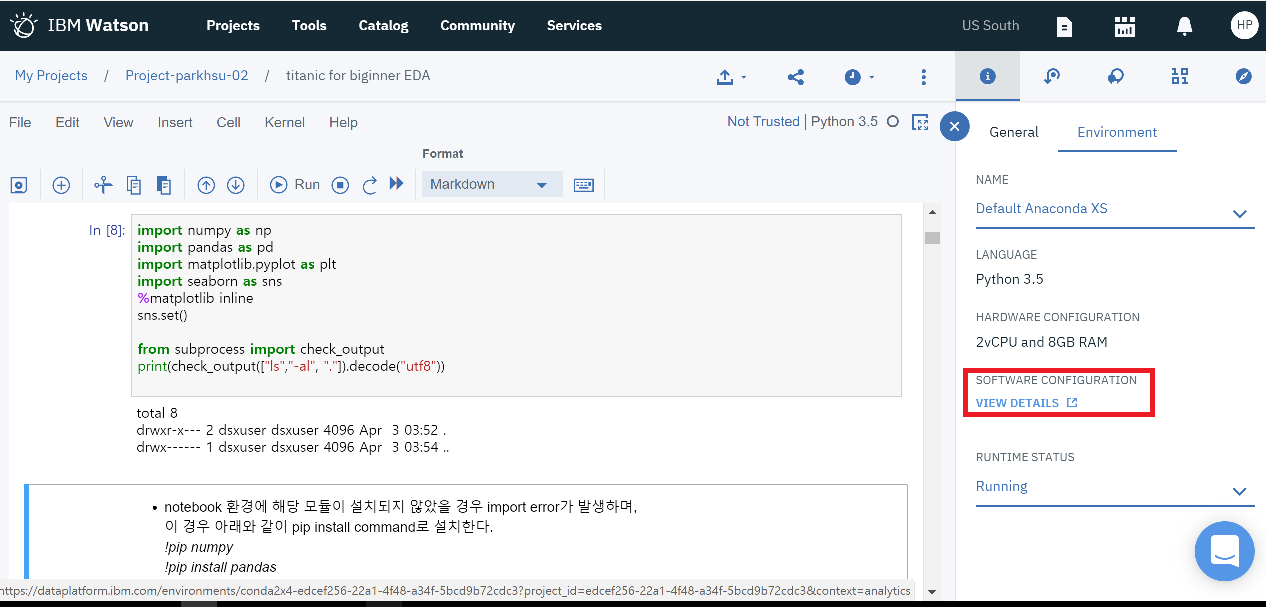

* SW configuration details
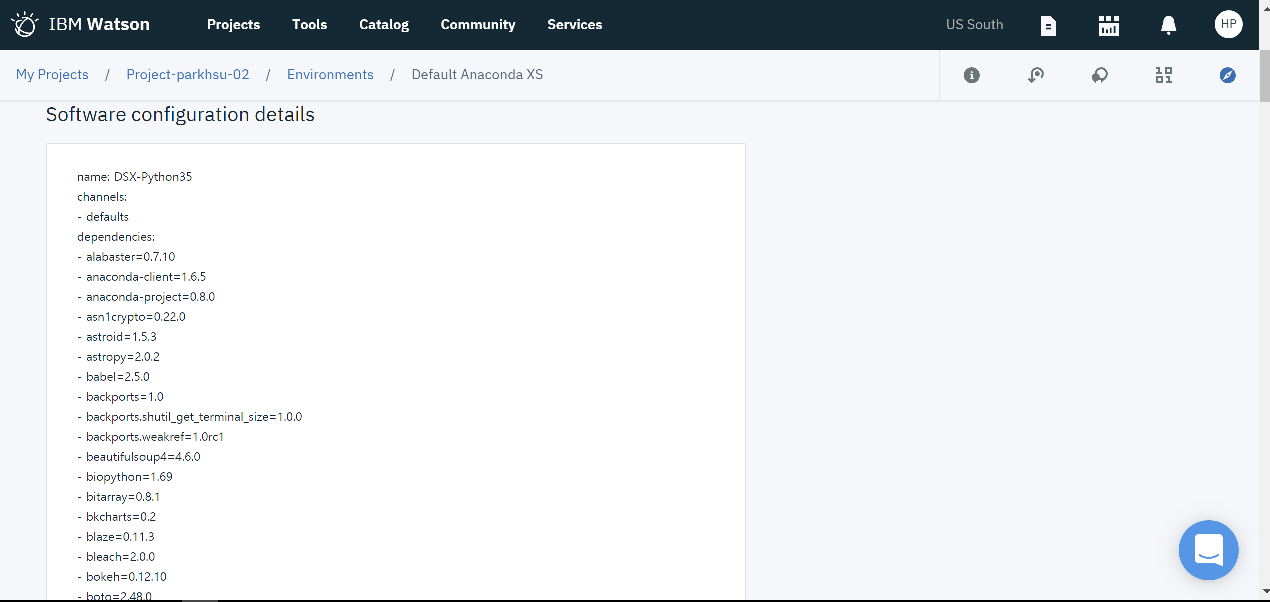

In [90]:
# df_train = pd.read_csv("../input/train.csv")
# df_test = pd.read_csv("../input/test.csv")

* 원래 소스에서는 input data file이 notebook 수행 directory에서  "../input" 에 위치하지만, 
* kaggle에서  download 하여 Watson studio 로 update 하여야 한다.

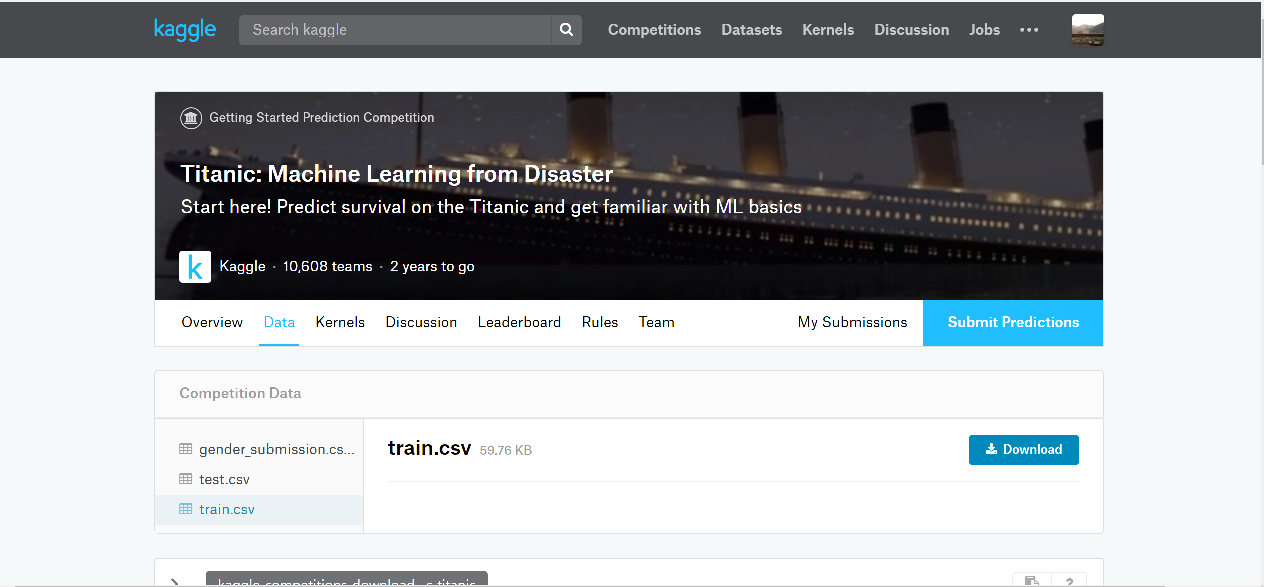

* IBM Watson studio 에서는 project file 로 loading 한다.

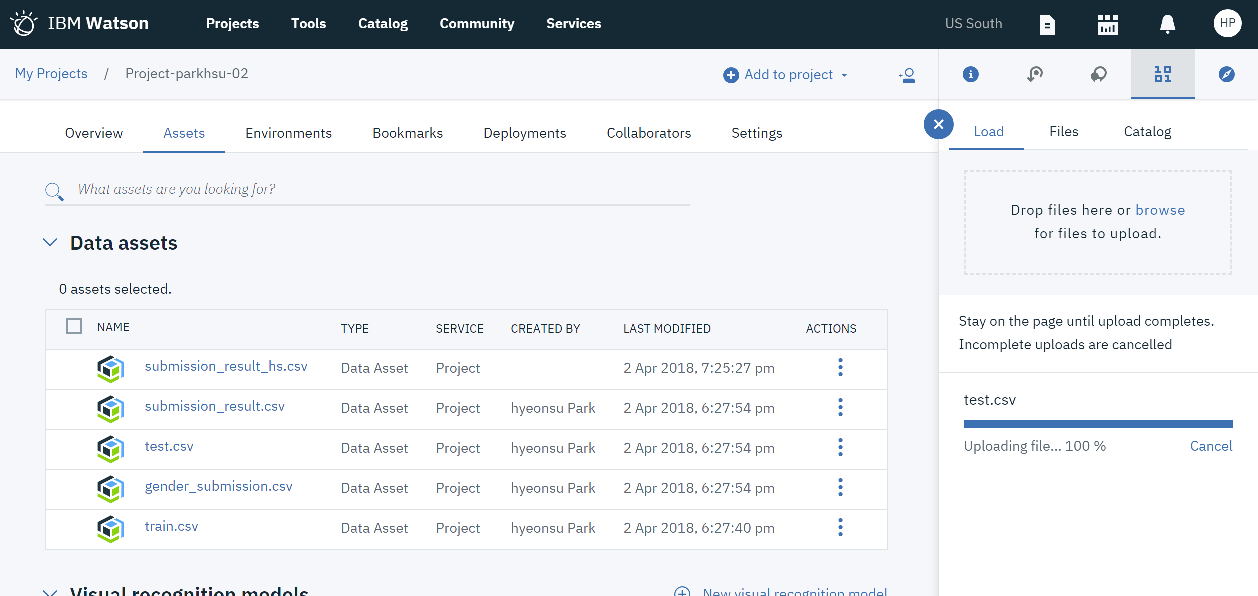

* 기존의 data file read 하는 로직은 삭제하고,  "Insert to code" - "Insert pandas DataFrame" 을 이용하여 소스코드를 추가 한다
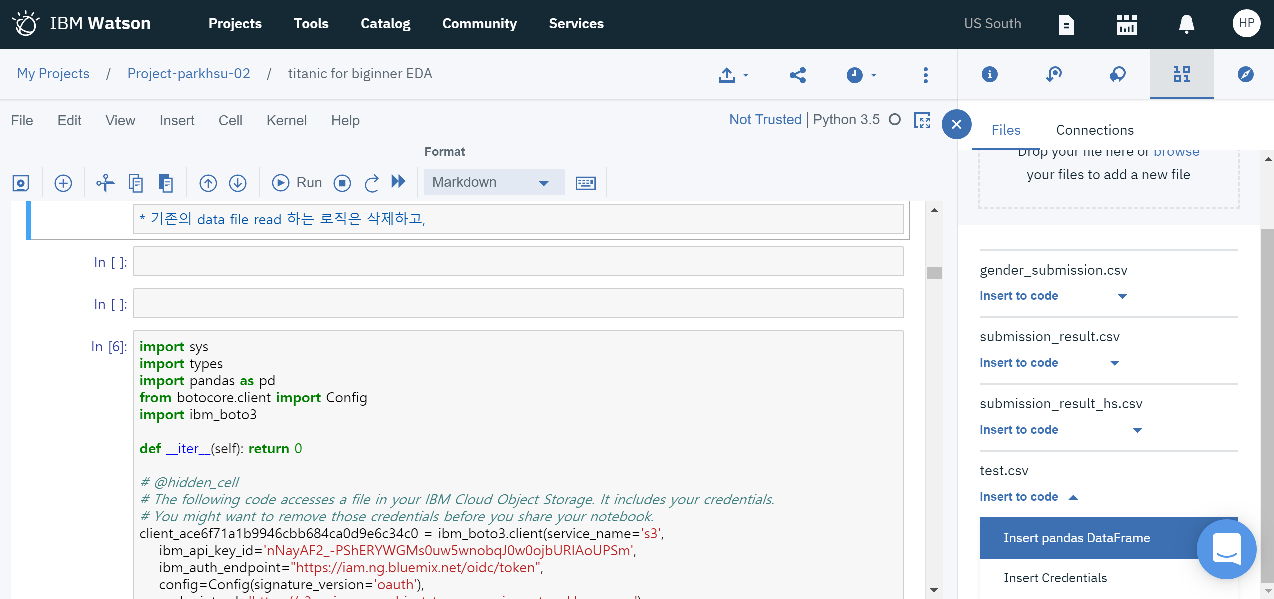

In [91]:
'''
Insert to code" 를 통해서 생성된 소스코드
생성된 코드에서  DataFrame name을 df_train, df_test 로 수정 필요함
'''
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ace6f71a1b9946cbb684ca0d9e6c34c0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nNayAF2_-PShERYWGMs0uw5wnobqJ0w0ojbURlAoUPSm',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ace6f71a1b9946cbb684ca0d9e6c34c0.get_object(Bucket='projectparkhsu02d1be16ce7e164fc694f1c69332955f0b',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)


In [92]:
body = client_ace6f71a1b9946cbb684ca0d9e6c34c0.get_object(Bucket='projectparkhsu02d1be16ce7e164fc694f1c69332955f0b',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)


## Part 1: Exploratory Data Analysis

In [93]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df_train has 891 entries, some values for Cabin and Age are missing

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [95]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Also in df_test some values for Age and many values for Cabin are missing

In [97]:
df_test.shape, df_train.shape

((418, 11), (891, 12))

Comparing distribution of features in df_train and df_test, Pclass and Age seem very similar, distributions for SibSo, Parch and Fare only slightly different

In [98]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [99]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Train data 에서 survived 건수는 얼마나 되는가 ?** 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


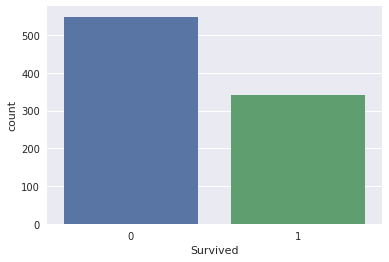

In [100]:
sns.countplot(x='Survived', data=df_train)

In [101]:
print(df_train.Survived.sum()/df_train.Survived.count()*100,'%')


38.3838383838 %


more people died than survived (38% survived)

-> base model : no survivors

submission : 0.627 accuracy

In [102]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)
print(df_test.head())
!ls -al 

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         0  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         0  
total 16
drwxr-x--- 2 dsxuser dsxuser 4096 Apr  4 01:40 .
drwx------ 1 dsxuser dsxuser 4096 Apr  4 01:39 ..
-rw-r----

**Sex: Female more likely to survive than male**

In [103]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


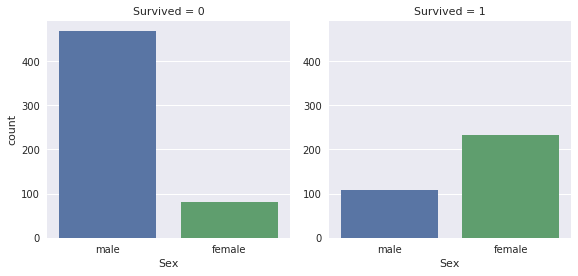

In [104]:
sns.factorplot(x='Sex', col='Survived', kind='count', data=df_train);

In [105]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.742038216561
% of men survived:    0.188908145581


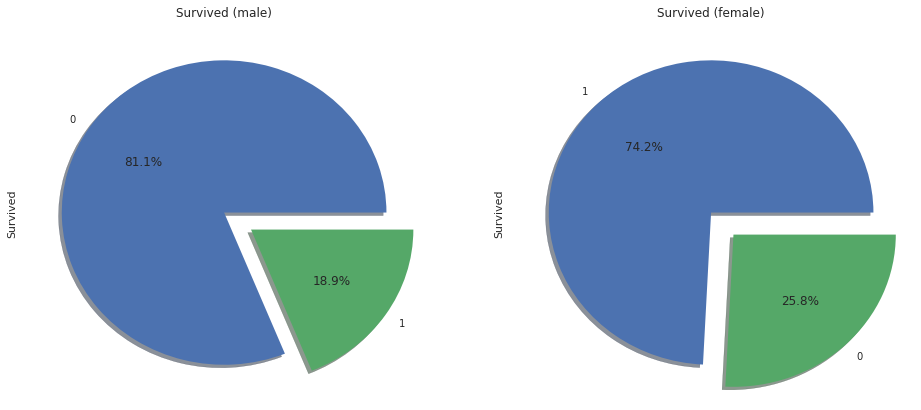

In [106]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Women were more likely to survive than men 

74 % of women survived
but only 19% of men
(in training set)

second model :
all women survived and all men died

submission : 0.766 accuracy


In [107]:
#df_test['Survived'] = df_test.Sex == 'female'
#df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
#df_test[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

**Passenger Class : Survival rate decreases with Pclass**

In [108]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [109]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.62962962963
Pclass=2 :  0.472826086957
Pclass=3 :  0.242362525458


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


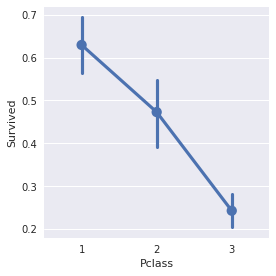

In [110]:
sns.factorplot('Pclass','Survived', data=df_train)
plt.show()

**Passenger Class and Sex :**

**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [111]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


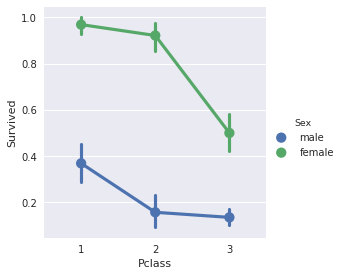

In [112]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

**Embarked : Survival rate lowest for S and highest for C**

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


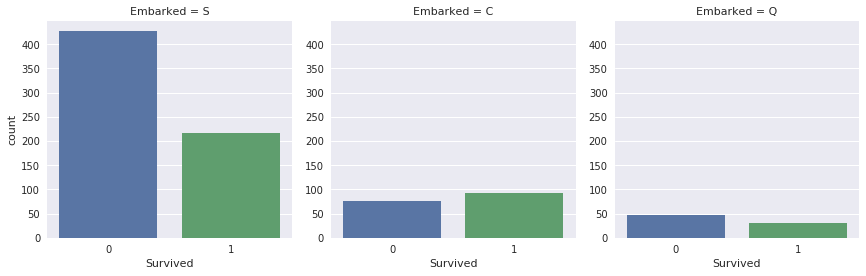

In [113]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


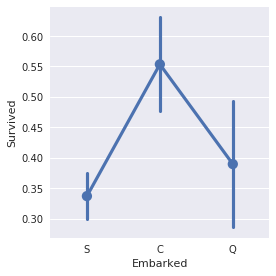

In [114]:
sns.factorplot('Embarked','Survived', data=df_train)
plt.show()

**Embarked and Sex**

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


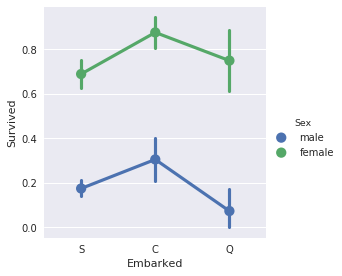

In [115]:
sns.factorplot('Embarked','Survived', hue= 'Sex', data=df_train)
plt.show()

**Embarked, Pclass and Sex :**

** Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived. **

** All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2 **

** For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4 **

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


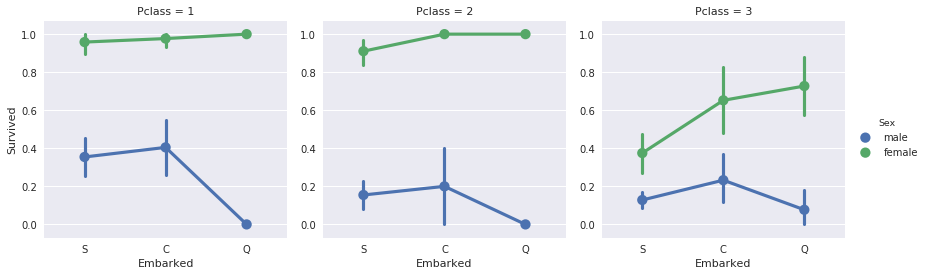

In [116]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'Sex', data=df_train)
plt.show()

In [117]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

third model :
based on PClass, Sex and Embarked ,
submission : 0.779 accuracy

In [118]:
# model 3
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

**Age:  continuous numerical  to  8 bins **

In [119]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [120]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


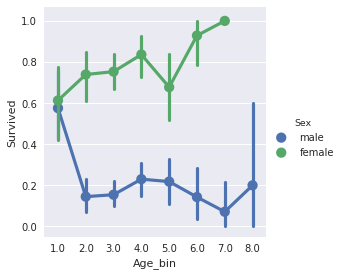

In [121]:
sns.factorplot('Age_bin','Survived',hue='Sex',data=df_train)
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


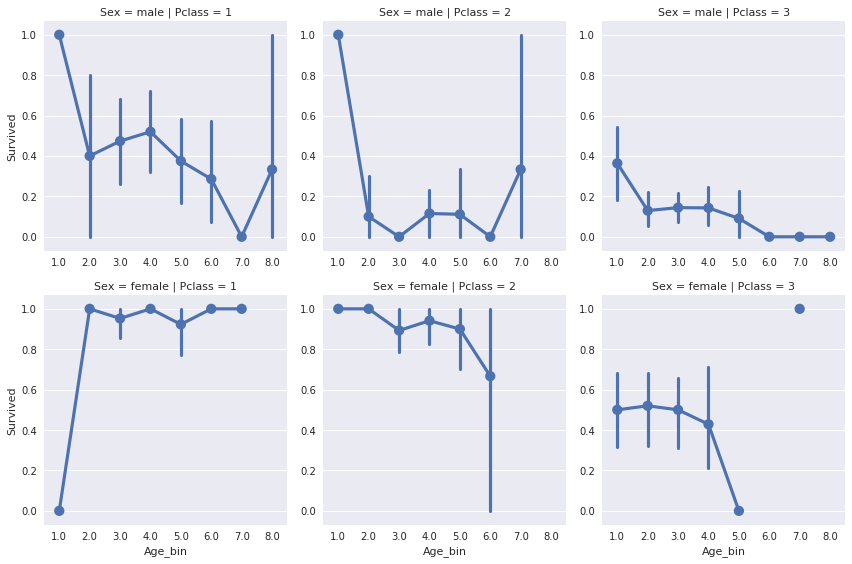

In [122]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [123]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For passengers in Age_bin = 1 (younger than 10) : All male in Pclass 1 and 2 survived

All female in Pclass 3 and Age_bin = 5 died. 

(Survival rate for female in Pclass 3 and Age_bin = 4 is below 50%)

(Survival rate for male in Pclass 1 and Age_bin = 4 is above 50%)



In [124]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

**SibSp and Parch**

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


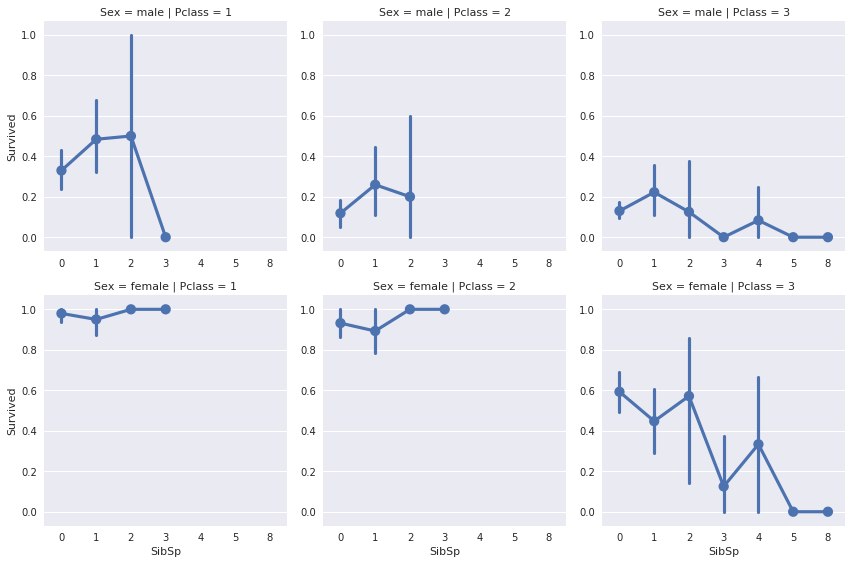

In [125]:
sns.factorplot('SibSp','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [126]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, no survival rate above 0.5 for any values of SibSp.
For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died.
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

In [127]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


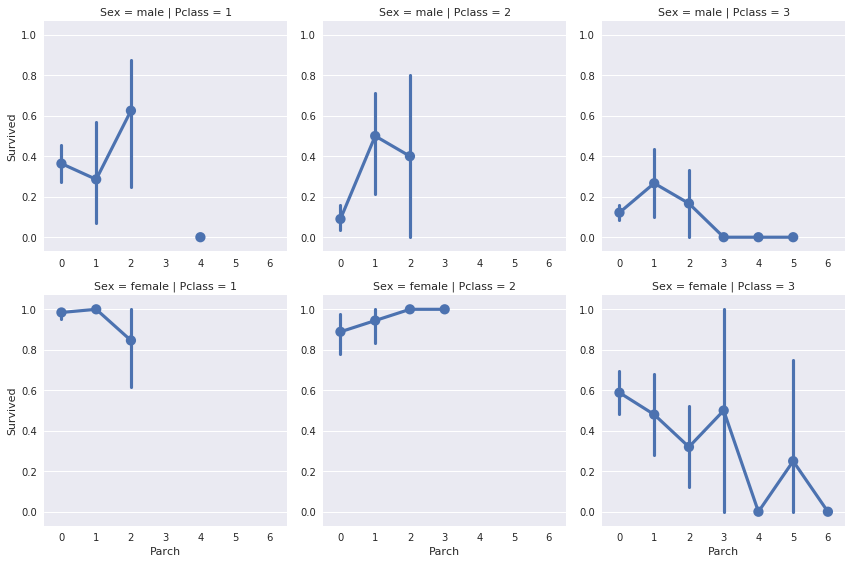

In [128]:
sns.factorplot('Parch','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [129]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Very similar to SibSp - 1 , but different values  ?
For females with Parch = 2 and Pclass = 3 survival rate is below 0.5  
All females with Parch = 4 and Pclass = 3 died.
All females with Parch > 4 died.
(For females with Parch = 1 and Pclass = 3 survival rate is below 0.5)
For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

In [130]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)

**Fare:  continuous numerical  to  12 bins **

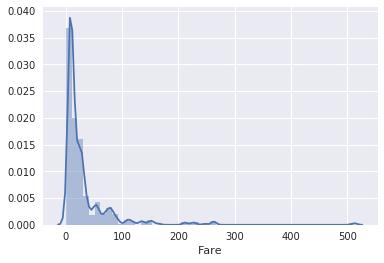

In [131]:
sns.distplot(df_train['Fare'])
plt.show()

In [132]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


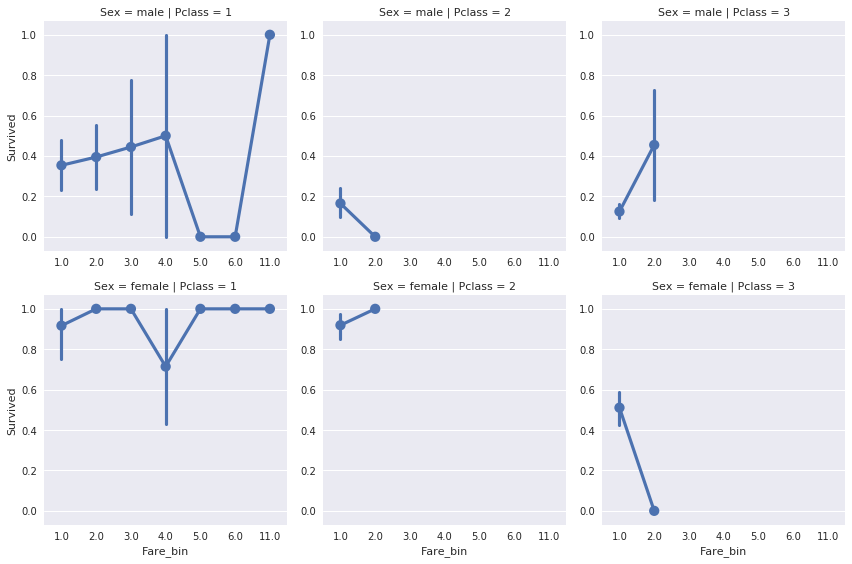

In [133]:
sns.factorplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [134]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [135]:
# males in Fare_bin = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

fourth model : model 3 + Age_bin, SibSp, Parch and Fare_bin  
submission : 0.789 accuracy

In [136]:
# model 4
# df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

In [137]:
df_test.drop(['Survived'],axis=1,inplace=True)


## Part 2: Data wrangling

building two new dataframes df_train_ml and df_test_ml  
these will have only ordinal features and no missing values so they can be used for ML algorithms  
converting categorical to numerical by pd.get_dummies  
dropping all features that seem to be not useful for prediction  
Then use the Standard scaler and apply train/test split

In [138]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

In [139]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [140]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [141]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [142]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [143]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [144]:
#df_test_ml.drop(['Survived'],axis=1,inplace=True)
df_test_ml.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [145]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


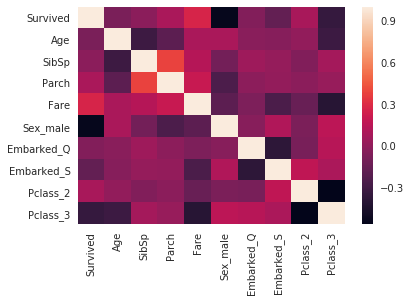

In [146]:
corr = df_train_ml.corr()
sns.heatmap(corr)

**Standard Scaler**

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

**train_test_split**

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

**all data for submission**

In [149]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

**fillna: fill nan with mean values for that column** 

In [150]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


## Part 3: Scikit-learn basic ML algorithms and comparison of model results

**Test simple sklearn models and compare by metrics**


**1. We test the following classifiers from scikit-learn:**  
* Logistic regression  
* Gaussian Naive Bayes  
* K nearest neighbors KNN  
* Decision tree classifier  
* Random forest classifier  
* SVM classifier

**2. For comparison of the results we use these metrics:**  
* accuracy_score, 
* classification_report, 
* confusion_matrix


**First we apply the data from test/train split to get a first overview of the model performance.  
Later we use the k fold cross validation which gives a better estimate for out of sample data.** 

### 1. Over all model testing

In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Logistic Regression**

In [152]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[107  16]
 [ 32  60]]
             precision    recall  f1-score   support

          0       0.77      0.87      0.82       123
          1       0.79      0.65      0.71        92

avg / total       0.78      0.78      0.77       215

0.776744186047


Train again for all data and submit

In [153]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

In [154]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
#sub_logmodel.to_csv('logmodel.csv',index=False)

**Gaussian Naive Bayes**

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[107  16]
 [ 36  56]]
             precision    recall  f1-score   support

          0       0.75      0.87      0.80       123
          1       0.78      0.61      0.68        92

avg / total       0.76      0.76      0.75       215

0.758139534884


**KNN - KNeighborsClassifier**

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [157]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[71 52]
 [26 66]]
             precision    recall  f1-score   support

          0       0.73      0.58      0.65       123
          1       0.56      0.72      0.63        92

avg / total       0.66      0.64      0.64       215

0.637209302326


In [158]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

In [159]:
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
#sub_knn.to_csv('knn.csv',index=False)

**Decision Tree Classifier 1/2**

In [160]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [161]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

             precision    recall  f1-score   support

          0       0.74      0.83      0.78       123
          1       0.73      0.62      0.67        92

avg / total       0.74      0.74      0.74       215

0.739534883721


**Decision Tree Classifier 2/2 (different parameters for max_features, max_depth and min_sample_split)**

In [162]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

             precision    recall  f1-score   support

          0       0.75      0.91      0.82       123
          1       0.83      0.59      0.69        92

avg / total       0.78      0.77      0.76       215

0.772093023256


all data

In [163]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

**Random Forest Classifier**

In [164]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[117   6]
 [ 35  57]]
             precision    recall  f1-score   support

          0       0.77      0.95      0.85       123
          1       0.90      0.62      0.74        92

avg / total       0.83      0.81      0.80       215

0.809302325581


Train again for all data and submit

In [166]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [167]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
#sub_rfc.to_csv('randforest.csv',index=False)

**SVM Classifier**

In [168]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

[[116   7]
 [ 34  58]]
             precision    recall  f1-score   support

          0       0.77      0.94      0.85       123
          1       0.89      0.63      0.74        92

avg / total       0.82      0.81      0.80       215

0.809302325581


In [170]:
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

### 2. K fold cross_validation for 3 classifier

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data  
It leads to a better estimate for out of sample data  than simple train test split

In [171]:
from sklearn.model_selection import cross_val_score

**SVM classifier**

In [172]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[ 0.81944444  0.80555556  0.76388889  0.875       0.81690141  0.8028169
  0.8028169   0.73239437  0.88732394  0.84507042]
0.815121283255


**Random Forest classifier**

In [173]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[ 0.76388889  0.76388889  0.76388889  0.875       0.8028169   0.83098592
  0.8028169   0.73239437  0.85915493  0.8028169 ]
0.799765258216


**DecisionTreeClassifier**

In [174]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[ 0.70833333  0.77777778  0.75        0.875       0.8028169   0.81690141
  0.8028169   0.76056338  0.83098592  0.84507042]
0.797026604069


### 가장 효율이 좋은 모델은  Decision Tree, Random Forest, SVC 임



In [175]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.797026604069
rfc     :  0.799765258216
svc     :  0.815121283255
